In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes

In [2]:
A = pd.read_csv("D:\Etlhive class data\Data sets shared on Skype\Cars93.csv")
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
import import_ipynb
from PM3 import replacer
replacer(A)

importing Jupyter notebook from PM3.ipynb
Missing Values replaced in DataFrame


In [4]:
X = A[['Price','MPG.city','Type','AirBags','Man.trans.avail']]
X.head()

,Price,MPG.city,Type,AirBags,Man.trans.avail
0,15.9,25,Small,None,Yes
1,33.9,18,Midsize,Driver & Passenger,Yes
2,29.1,20,Compact,Driver only,Yes
3,37.7,19,Midsize,Driver only,Yes
4,30.0,22,Midsize,Driver only,Yes


In [5]:
mark_array = X.values

In [6]:
mark_array[:,0]=mark_array[:,0].astype('float')
mark_array[:,1]=mark_array[:,1].astype('float')

In [7]:
mark_array[:5]

array([[15.9, 25.0, 'Small', 'None', 'Yes'],
       [33.9, 18.0, 'Midsize', 'Driver & Passenger', 'Yes'],
       [29.1, 20.0, 'Compact', 'Driver only', 'Yes'],
       [37.7, 19.0, 'Midsize', 'Driver only', 'Yes'],
       [30.0, 22.0, 'Midsize', 'Driver only', 'Yes']], dtype=object)

In [8]:
kproto = KPrototypes(n_clusters=3,verbose=2)
clusters = kproto.fit_predict(mark_array,categorical=[2,3,4])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 35, ncost: 4014.5045801117717
Run: 1, iteration: 2/100, moves: 12, ncost: 3641.4152960928723
Run: 1, iteration: 3/100, moves: 4, ncost: 3605.156997317079
Run: 1, iteration: 4/100, moves: 0, ncost: 3605.156997317079
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 41, ncost: 3843.9230121283986
Run: 2, iteration: 2/100, moves: 10, ncost: 3584.1775635270824
Run: 2, iteration: 3/100, moves: 4, ncost: 3521.696460936847
Run: 2, iteration: 4/100, moves: 0, ncost: 3521.696460936847
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 25, ncost: 3858.123880397326
Run: 3, iteration: 2/100, moves: 6, ncost: 3641.4152960928723
Run: 3,

In [9]:
print(kproto.cluster_centroids_)

[['35.85294117647059' '18.352941176470587' 'Midsize' 'Driver only' 'Yes']
 ['11.314705882352944' '27.764705882352942' 'Small' 'None' 'Yes']
 ['19.52857142857142' '19.61904761904762' 'Midsize' 'Driver only' 'No']]


In [10]:
cluster_list = []
for c in clusters:
    cluster_list.append(c)

In [11]:
A['Cluster']=cluster_list

In [12]:
A.groupby(by='Cluster').count()['Model']

Cluster
0    17
1    34
2    42
Name: Model, dtype: int64

In [13]:
X['Cluster']=cluster_list

In [14]:
X[X.Cluster==0]

,Price,MPG.city,Type,AirBags,Man.trans.avail,Cluster
1,33.9,18,Midsize,Driver & Passenger,Yes,0
2,29.1,20,Compact,Driver only,Yes,0
3,37.7,19,Midsize,Driver only,Yes,0
4,30.0,22,Midsize,Driver only,Yes,0
9,34.7,16,Large,Driver only,No,0
10,40.1,16,Midsize,Driver & Passenger,No,0
18,38.0,17,Sporty,Driver only,Yes,0
21,29.5,20,Large,Driver only,No,0
47,47.9,17,Midsize,Driver only,No,0
48,28.0,18,Midsize,Driver only,Yes,0


In [15]:
X[X.Cluster==1]

,Price,MPG.city,Type,AirBags,Man.trans.avail,Cluster
0,15.9,25,Small,None,Yes,1
11,13.4,25,Compact,None,Yes,1
12,11.4,25,Compact,Driver only,Yes,1
22,9.2,29,Small,None,Yes,1
23,11.3,23,Small,Driver only,Yes,1
24,13.3,22,Compact,Driver only,Yes,1
28,12.2,29,Small,None,Yes,1
30,7.4,31,Small,None,Yes,1
31,10.1,23,Small,None,Yes,1
32,11.3,22,Compact,None,Yes,1


In [16]:
X[X.Cluster==2]

,Price,MPG.city,Type,AirBags,Man.trans.avail,Cluster
5,15.7,22,Midsize,Driver only,No,2
6,20.8,19,Large,Driver only,No,2
7,23.7,16,Large,Driver only,No,2
8,26.3,19,Midsize,Driver only,No,2
13,15.1,19,Sporty,Driver & Passenger,Yes,2
14,15.9,21,Midsize,None,No,2
15,16.3,18,Van,None,No,2
16,16.6,15,Van,None,No,2
17,18.8,17,Large,Driver only,No,2
19,18.4,20,Large,Driver & Passenger,No,2


In [17]:
a = input("Enter your favourite car: ")
#recommended cars
q = A[A['Make']==a].Cluster.values[0]
r = A[A.Cluster == q].Make.values
print("\nYour similar cars: ")
print(r)

Enter your favourite car: BMW 535i

Your similar cars: 
['Acura Legend' 'Audi 90' 'Audi 100' 'BMW 535i' 'Cadillac DeVille'
 'Cadillac Seville' 'Chevrolet Corvette' 'Chrysler Imperial'
 'Infiniti Q45' 'Lexus ES300' 'Lexus SC300' 'Lincoln Continental'
 'Lincoln Town_Car' 'Mazda RX-7' 'Mercedes-Benz 190E' 'Mercedes-Benz 300E'
 'Saab 900']


In [18]:
X['Type'].unique()

array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

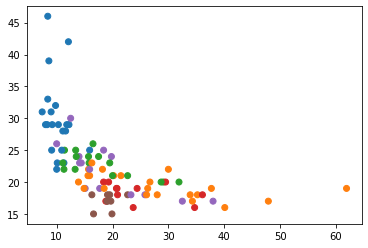

In [19]:
import matplotlib.pyplot as plt
colors = {'Small':'tab:blue','Midsize':'tab:orange','Compact':'tab:green','Large':'tab:red','Sporty':'tab:purple','Van':'tab:brown'}
plt.scatter(X['Price'],X['MPG.city'],c= X['Type'].map(colors))
plt.show()